<a href="https://colab.research.google.com/github/Inkyu-Yang356/deep-learning-practice/blob/main/easy_deep_learning_principle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장. 딥러닝 핵심 미리보기

## 나의 첫 딥러닝: '10장 폐암 수술 환자의 생존율 예측' 코드 미리보기

### 1. 환경 준비

In [1]:
from tensorflow.keras.models import Sequential  # 모델 구조
from tensorflow.keras.layers import Dense, Input  # 모델 층
from keras.utils import plot_model  # 모델 시각화
import numpy as np

### 2. 데이터 준비

In [2]:
!git clone https://github.com/taehojo/data.git

Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",")
X = Data_set[:,0:16]  # 16개의 특성 Input
y = Data_set[:,16]  # Target

Cloning into 'data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 9), reused 26 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 483.12 KiB | 12.71 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [22]:
import pandas as pd
df = pd.read_csv('./data/ThoraricSurgery3.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


In [4]:
df.shape

(470, 17)

### 3. 구조 결정

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

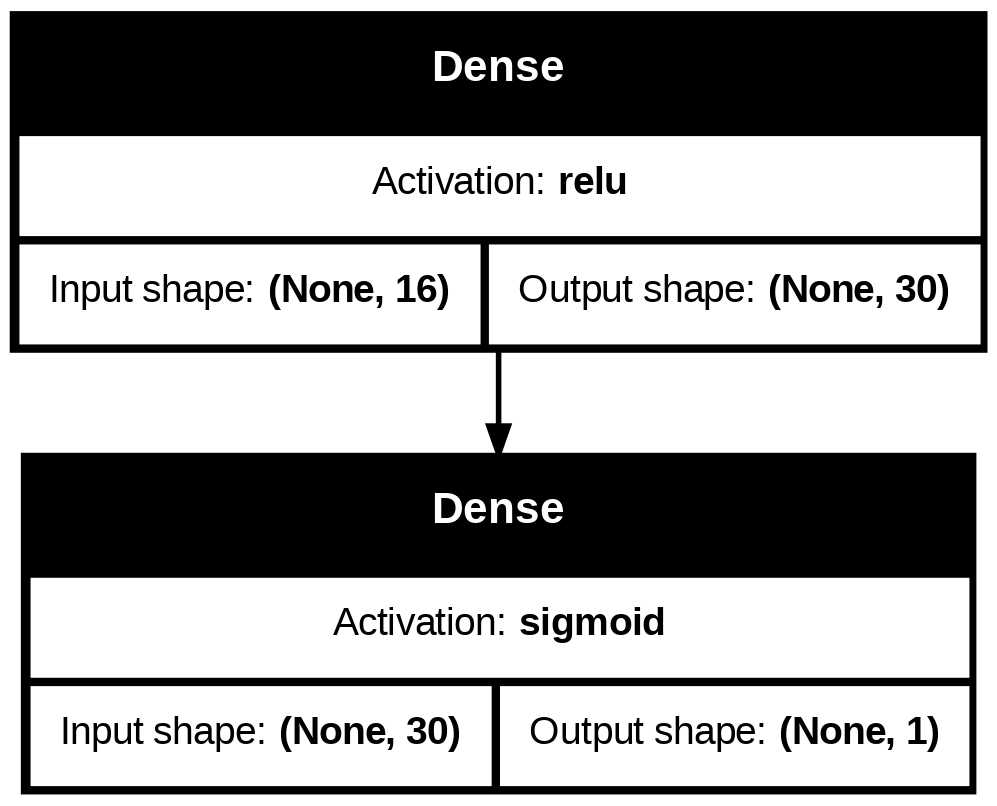

In [5]:
# model = Sequential([
#   Input(shape=(16,))
#   ,Dense(30, activation='relu')
#   ,Dense(1, activation= 'sigmoid')
# ])

model = Sequential()   # 모델 구조
model.add(Input(shape=(16,)))  # Input Layer
model.add(Dense(30, activation='relu'))  # Hidden Layer
model.add(Dense(1, activation= 'sigmoid'))  # Ouput Layer

model.summary()  # 테이블 구조로 요약
plot_model(model,show_shapes=True, show_layer_activations=True)  # 모델 시각화

### 4. 모델 실행

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # 손실함수, 옵티마이저, 평가지표
history=model.fit(X, y, epochs=5, batch_size=16)  # 학습 별 기록 저장

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1229 - loss: 7.6742
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7807 - loss: 0.9496
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8167 - loss: 0.8189
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8018 - loss: 0.7738
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8305 - loss: 0.5165


In [7]:
history.history  # Epoch 별 정확도, 손실함수 결과

{'accuracy': [0.16595745086669922,
  0.8212766051292419,
  0.8255318999290466,
  0.8255318999290466,
  0.8255318999290466],
 'loss': [5.136507034301758,
  0.8682068586349487,
  0.7823646664619446,
  0.6498399972915649,
  0.5311421751976013]}

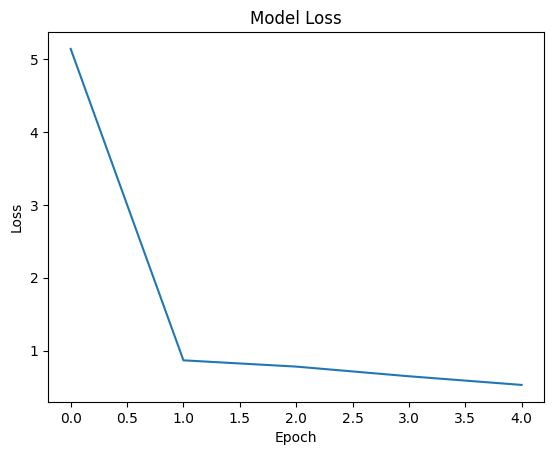

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])  # 손실함수 시각화
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

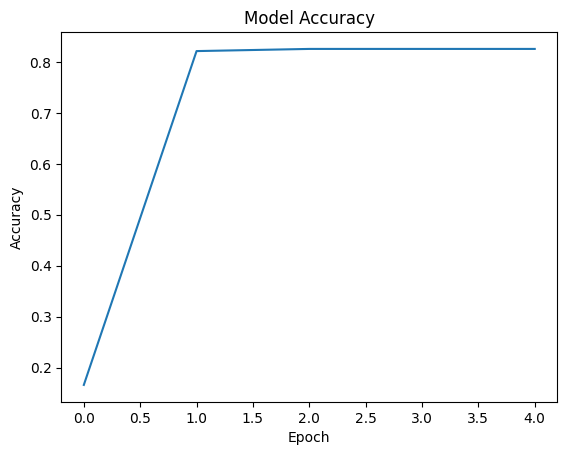

In [9]:
plt.plot(history.history['accuracy'])  # 정확도 시각화
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [78]:
loss, accuracy = model.evaluate(X, y)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8136 - loss: 0.5137 
Test Loss: 0.4804
Test Accuracy: 0.8277


문제 1 : train, test 데이터셋을 나누는 코드를 추가하고 다시 실행해보세요
- 24번째 셀의 evaluate()의 파라미터값도 추가한 변수 중 테스트 데이터셋으로 변경

문제 2: model2라는 변수에 아래 조건을 만족하는 모델을 저장하고 학습해서 결과를 비교해보세요
- 입력층 동일
- 은닉층1 : 64개의 뉴런, 활성화함수 ReLU 사용
- 은닉층2 : 32개의 뉴런, 활성화함수 ReLU 사용
- 출력층 동일

In [188]:
# 문제 1

from sklearn.model_selection import train_test_split

input_ = df.iloc[:, :16]
target_ = df.iloc[:, 16]
train_X, test_X, train_y, test_y = train_test_split(input_, target_, test_size=0.2, random_state=42)  # Train:Test, 8:2
print(train_X.shape, test_X.shape)

loss, accuracy = model.evaluate(test_X, test_y)
print(f"Test Loss:  {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

(376, 16) (94, 16)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7789 - loss: 0.5472
Test Loss:  0.5556
Test Accuracy: 0.7766


In [189]:
# 문제 2

model2 = Sequential([
    Input(shape=(16,)),  # Input Layer
    Dense(64, activation='relu'),  # Hidden Layer 1
    Dense(32, activation='relu'),  # Hidden Layer 2
    Dense(1, activation='sigmoid')  # Output Layer
])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # 이진 크로스엔트로피, 아담, 평가지표
history = model2.fit(train_X, train_y, epochs=5, batch_size=4)

Epoch 1/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8385 - loss: 0.5117
Epoch 2/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8542 - loss: 0.4453
Epoch 3/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8676 - loss: 0.4224
Epoch 4/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8555 - loss: 0.4472
Epoch 5/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8493 - loss: 0.4423


In [190]:
loss, accuracy = model2.evaluate(test_X, test_y)
print(f"Test Loss:  {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7974 - loss: 0.6256 
Test Loss:  0.6416
Test Accuracy: 0.7979


In [191]:
model2.summary()

Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_147 (Dense)               │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,605 (37.52 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,404 (25.02 KB)

In [192]:
history.history

{'accuracy': [0.8510638475418091,
  0.8643617033958435,
  0.8670212626457214,
  0.8643617033958435,
  0.8643617033958435],
 'loss': [0.515831470489502,
  0.44611144065856934,
  0.45446306467056274,
  0.4412221312522888,
  0.43125638365745544]}

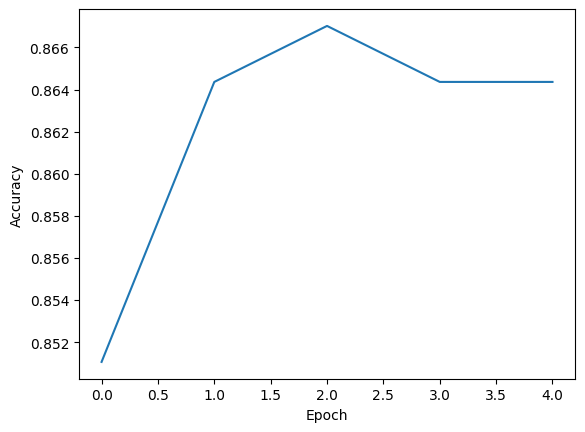

In [193]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

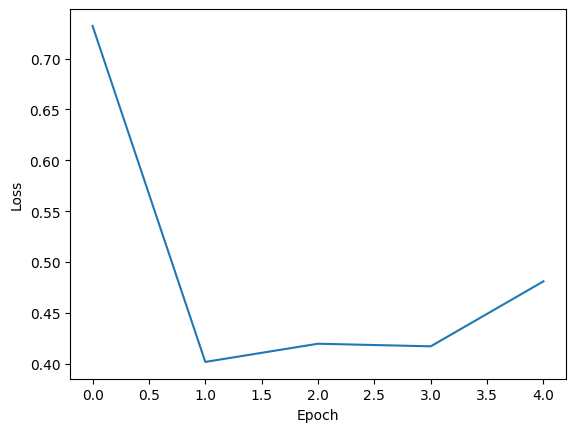

In [187]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()